**Fourier program C**

The approach used by Fourier program B is appropriate when the structure of the signal remains constant. However many signals have a structure that varies significantly with time, for example music. As a result the harmonic content will change and simply computing one Fourier transform will not reveal this variability, it is necessary to calculate a succession of Fourier transforms and display these in an appropriate form. A common method is to construct a spectrogram which uses time for the horizontal axis, frequency for the vertical axis and a colour scheme to represent the amplitude of the Fourier components at a particular time and frequency. Fourier program C reads data from either a csv or wav file and constructs a spectrogram. It also plots the input data f\(t\) and the standard Fourier transform over a limited time range. 

Study a number of the following data files and convince yourself that the form of the spectrogram is consistent with the form of the input data f\(t\) – you can listen to the wav files with suitable software

●	swept\_sine\_wave.csv \-  a sine wave whose frequency increases with time

●	swept\_square\_wave.csv \- a square wave whose frequency increases with time

●	step\_through\_waveforms.csv – starts with a sine wave and then cycles through a square wave, triangular wave, sawtooth wave and back to a sine wave

●	Piano.wav – starts with middle C and then proceeds upwards through an octave to C above middle C and then returns to middle C. Followed by a C chord, an E chord and a G chord

●	Bach.wav – a short piece of music



Duration of data 10.0
Fourier transform plotted for data over range  2.0 s to 2.2 s


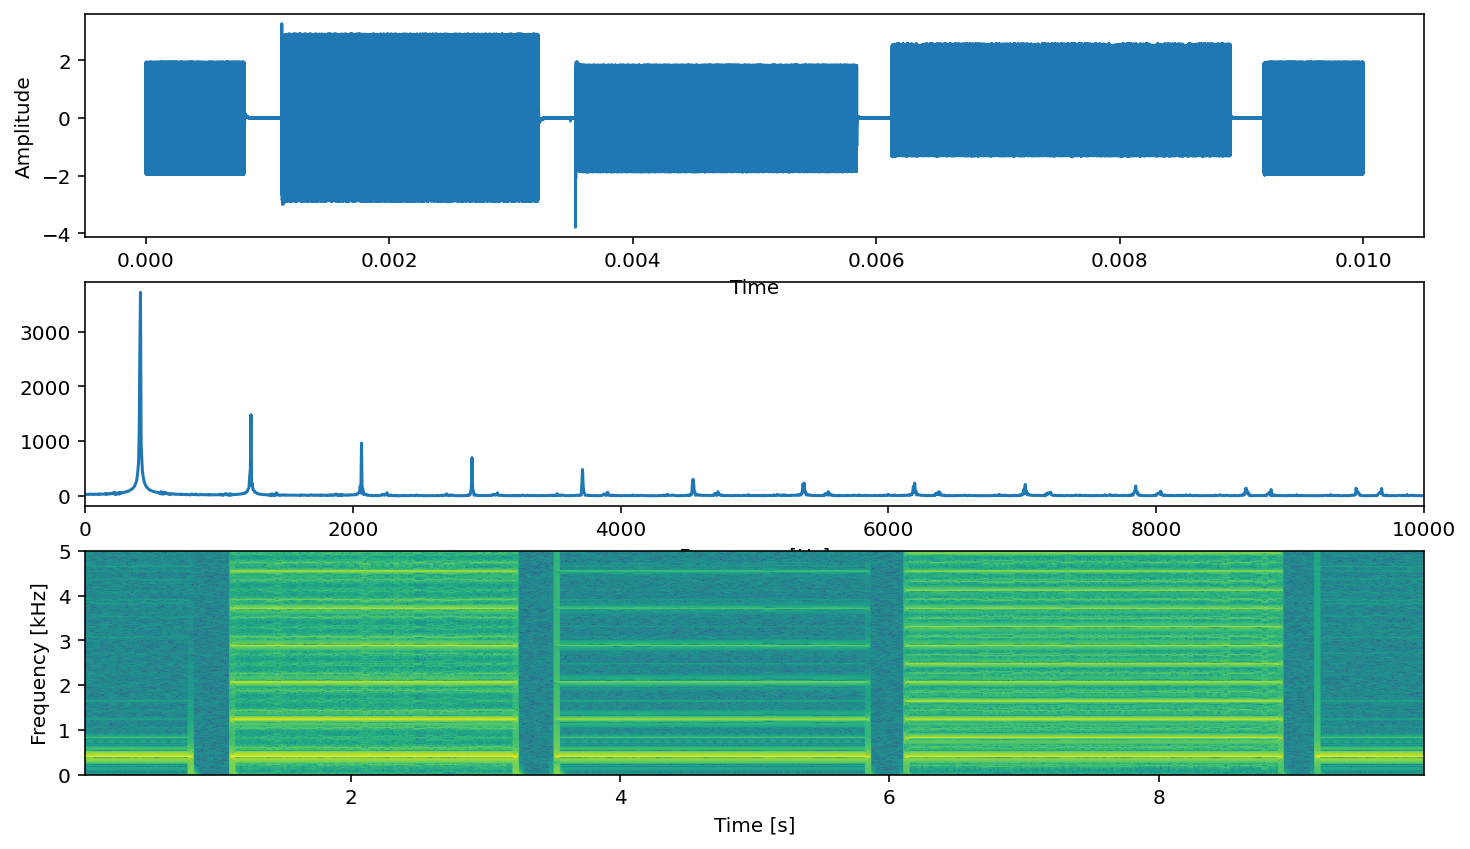

In [3]:
from scipy import signal
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.fft import irfft
from scipy import signal
#from playsound import playsound

file_name = 'step_through_waveforms.csv' # name of file with extension containing data to be analysed

Upper_frequency = 10000 # set upper frequency for plot of Fourier transform, adjust to show Fourier components clearly
M =1024 # number of data points per Fourier transform in spectrograph, should be power of 2 

start_time = 2.0 # time at which individual Fourier transform is calculated from
N_data_points = 4096 # number of data points used to calculate individual Fourier transform

if file_name[-3:]=='csv': # file is csv type
    data=np.genfromtxt(file_name,delimiter=',') # Read in f(t) from file
    # separates data into two arrays, time and amplitudes
    time = data[:,0]
    amplitude = data[:,1]
    samplingFrequency = 1/(time[1]-time[0]) # sampling frequency found from time difference bewteen successive points

if file_name[-3:]=='wav': # file is a wav type
    rate, audio = wavfile.read(file_name) # read in audio file
    #amplitude = audio # replace next line with this if data is mono
    amplitude = np.mean(audio, axis=1) # replace previous line with this one if data is stero
    time = np.arange(0, len(audio)/rate, 1/rate) # create time axis array for audio plot
    samplingFrequency=rate

N=len(amplitude) # number of data points

# time duration of audio
duration=N/samplingFrequency
print('Duration of data', duration)

# calculate spectrogram
freqs, times, Sx = signal.spectrogram(amplitude, fs=samplingFrequency, 
                                      nperseg=M, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

start_point = int(start_time/duration*N) #finds initial data point from where FT is calculated
amplitude_subset = amplitude[start_point:start_point+N_data_points] # subset of data for individual FT, time slice
end_time = int((start_point+N_data_points)/N*duration*100)/100
print ('Fourier transform plotted for data over range ', start_time,'s to',end_time,'s')

# find and plot Fourier transform of time slice
yf3 = rfft(amplitude_subset)
xf3 = rfftfreq(len(amplitude_subset), 1 / samplingFrequency)
plt.subplot(312)
plt.xlim([0,Upper_frequency])
plt.xlabel('Frequency [Hz]')
plt.plot(xf3, np.abs(yf3))

# plot spectrogram
plt.subplot(313)
plt.ylim([0,5]) # limits of frequency axis in kHz
plt.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis', shading='auto')
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time [s]');

#plot the input data
plt.subplot(311)
plt.plot(time/1000, amplitude)
plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.savefig('figure.jpg')# uncomment if you want to save the spectrogram as an image
plt.show()
